In [40]:
import pickle
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def linear_regression_solver(X, Y):
    coeffs = np.matmul( np.linalg.inv( np.matmul(X.T, X) ), np.matmul(X.T, Y) )
    y_estimate = np.matmul(X, coeffs)
    return coeffs, y_estimate


def ridge_regression_solver(X, y, lamb):
    n, m = X.shape
    I = np.identity(m)
    norm_list = []
    features = np.matmul( np.linalg.inv( np.matmul(X.T, X) + lamb * I), np.matmul(X.T, y) )
    for i in range(n):
        norm_list.append( np.linalg.norm(np.matmul(X[i,:], features) - y[i,:]) ** 2 )
    error = np.mean(norm_list)
    return features, error

def ridge_regression_solver_2(X, y, lamb):
    n, m = X.shape
    I = np.identity(m)
    norm_list = []
    features = np.matmul( np.linalg.inv( np.matmul(X.T, X) + lamb * I), np.matmul(X.T, y) )
    for i in range(n):
        norm_list.append( np.linalg.norm(np.matmul(X[i,:], features) - y[i]) ** 2 )
    error = np.mean(norm_list)
    return features, error


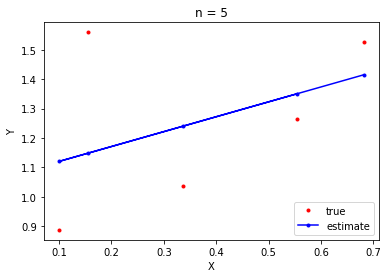

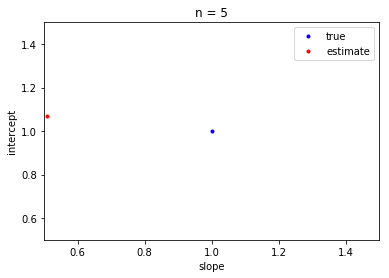

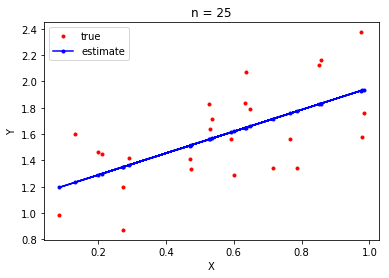

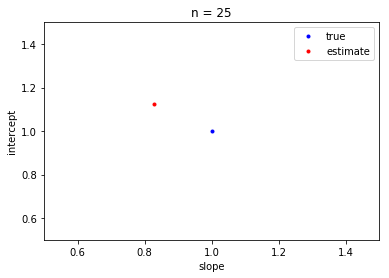

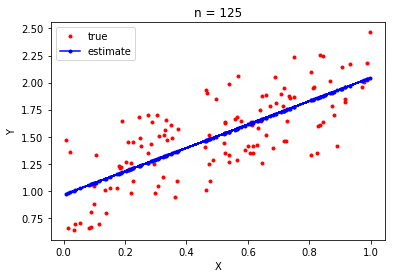

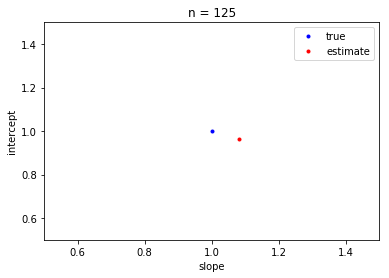

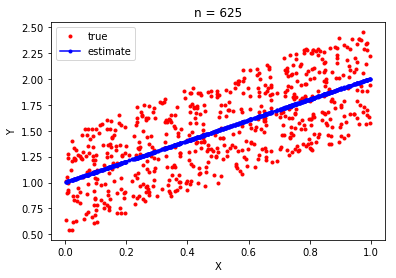

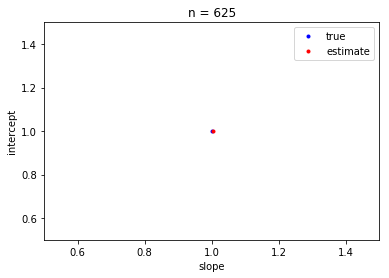

In [41]:
# Problem 2
# Question 2.e

num = [5, 25, 125, 625]
w_star, b_star = 1, 1

for i in num:
    X = np.ones( (i, 2), "float64" )
    Y = np.zeros( (i, 1), "float64" )
    
    X[:, 0] = np.random.random(i)
    Z = np.random.uniform(-0.5, 0.5, i)
    Y = X[:, 0] * w_star + b_star + Z
    coeffs, y_estimate = linear_regression_solver(X, Y)
    w, b = coeffs
    plt.figure()
    plt.plot(X[:, 0], Y, "r.", label="true")
    plt.plot(X[:, 0], y_estimate , "b.-", label="estimate")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("n = " + str(i))
    
    plt.figure()
    plt.plot(w_star, b_star, "b.", label="true")
    plt.plot(w, b , "r.", label="estimate")
    plt.xlabel("slope")
    plt.ylabel("intercept")
    plt.xlim([0.5, 1.5])
    plt.ylim([0.5, 1.5])
    plt.legend()
    plt.title("n = " + str(i))
    
plt.show()

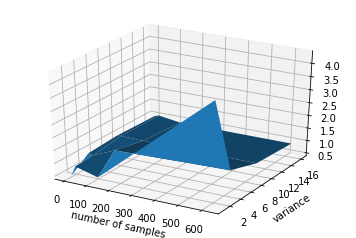

In [42]:
# Question 2.i

num = [5, 25, 125, 625]
var = [1, 4, 9, 16]
error_grid = np.zeros( (len(num), len(var)), "float64")

for i in range(len(num)):
    s = int(num[i])
    for j in range(len(var)):
        v = int(var[j])
        X = np.zeros( (s, 2), "float64" )
        Y = np.zeros( (s, 1), "float64" )

        X[:, 0] = np.random.random(s)
        X[:, 1] = np.random.random(s)
        W = np.random.normal(0, v, 2)
        Z = np.random.normal(0, 1, s)
        Y = np.matmul(X, W) + Z
        features, error = ridge_regression_solver_2(X, Y, 1/v)
        error_grid[i, j] = error
    
num_grid, var_grid = np.meshgrid(num, var)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(num_grid, var_grid, error_grid)
plt.xlabel("number of samples")
plt.ylabel("variance")
plt.show()


c:\users\nin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\nin\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\numeric.py:1795: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
c:\users\nin\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\numeric.py:1800: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
c:\users\nin\appdata\local\programs\python\python36-32\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


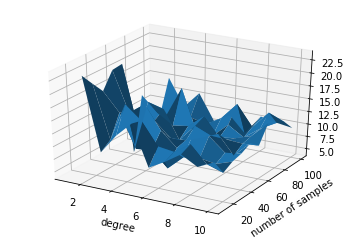

In [43]:
# Problem 4
# Question 4.e

m, c = 1, 1

n = np.linspace(10, 100, num=10, endpoint=True)
D = np.linspace(1, 10, num=10, endpoint=True)

error_grid = np.zeros( (len(D), len(n)), "float64")

for i in range(len(D)):
    d = int(D[i])
    for j in range(len(n)):
        s = int(n[j])
        W = np.random.normal(0, 1, s)
        x_vector = np.random.uniform(-1, 1, s)
        Y = m * x_vector + c + W

        X = np.zeros( (s, d + 1), "float64" )
        for k in range(d + 1):
            X[:, k] = x_vector ** k
        coeffs, y_estimate = linear_regression_solver(X, Y)
        error = np.linalg.norm(y_estimate - Y) ** 2 / j
        error_grid[i, j] = error
        
D_grid, n_grid = np.meshgrid(D, n)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(D_grid, n_grid, error_grid)
plt.xlabel("degree")
plt.ylabel("number of samples")
plt.show()
        

In [47]:
DATA_DIR = "hw03-data"

def condition_number(X, lamb):
    n, m = X.shape
    I = np.identity(m)
    eigs, _ = np.linalg.eig( np.matmul(X.T, X) + lamb * I)
    eig_min, eig_max = np.amin(eigs), np.amax(eigs)
    return eig_max ** 2 / eig_min ** 2

    
def evaluate(features, X, y):
    n, m = X.shape
    y_estimate = np.zeros( y.shape, "float64" )
    error_list = []
    bias_list = []
    y_estimate_list = []
    for i in range(n):
        y_estimate[i,:] = np.matmul(X[i,:], features)
        error_list.append( np.linalg.norm(y_estimate[i,:]  - y[i,:]) ** 2 )
        bias_list.append( np.linalg.norm(y_estimate[i,:]  - y[i,:]) )
        y_estimate_list.append( np.linalg.norm(y_estimate[i,:]) )
    error = np.mean(error_list)
    bias = np.mean(bias_list)
    variance = np.var(y_estimate_list)
    return error, bias, variance


# Problem 5
# Question 5.a

fid = open(os.path.join(DATA_DIR, "x_train.p"), "rb")
x_train_list = pickle.load(fid, encoding="latin1")
x_train = np.array( [i.flatten() for i in x_train_list], dtype="float64" )
fid.close()

fid = open(os.path.join(DATA_DIR, "y_train.p"), "rb")
y_train = np.array(pickle.load(fid, encoding="latin1"), dtype="float64")
fid.close()

n, m = x_train.shape
print("Question 5.a:")

try:
    policy = np.matmul( np.linalg.inv( np.matmul(x_train.T, x_train) ), np.matmul(x_train.T, y_train) )
    print(policy)
    print()
except np.linalg.LinAlgError as e:
    print(str(e))
    print()


Question 5.a:
Singular matrix



In [48]:
# Question 5.b:

lamd = [0.1, 1, 10, 100, 1000]
error_list = []
policy_list = []

print("Question 5.b:")
for l in lamd:
    print("l = " + str(l), end="    ")
    policy, error = ridge_regression_solver(x_train, y_train, l)
    policy_list.append(policy)
    print("error = " + str(error))
print()


Question 5.b:
l = 0.1    error = 8.48330028526e-11
l = 1    error = 5.95495690254e-13
l = 10    error = 1.25678241957e-11
l = 100    error = 1.25561464086e-09
l = 1000    error = 1.24593399019e-07



In [49]:
# Question 5.c:

x_train_standardized = np.zeros( x_train.shape, "float64")
x_train_standardized = x_train * 2.0 / 255.0 - 1
policy_standardized_list = []

print("Question 5.c:")
for l in lamd:
    print("l = " + str(l), end="    ")
    policy, error = ridge_regression_solver(x_train_standardized, y_train, l)
    policy_standardized_list.append(policy)
    print("error = " + str(error))
print()

Question 5.c:
l = 0.1    error = 3.25574750613e-07
l = 1    error = 2.91051229057e-05
l = 10    error = 0.0015903814573
l = 100    error = 0.0347731220424
l = 1000    error = 0.254402961468



In [4]:
# Question 5.d:

print("Question 5.d:")
print("Without standardization: k = " + str(condition_number(x_train, 100)))
print("With standardization: k = " + str(condition_number(x_train_standardized, 100)))
print()

Question d:
Without standardization: k = (2.77852259576e+15+0j)
With standardization: k = (197781.154336+0j)


In [26]:
# Question 5.e:

fid = open(os.path.join(DATA_DIR, "x_test.p"), "rb")
x_test_list = pickle.load(fid, encoding="latin1")
x_test = np.array( [i.flatten() for i in x_test_list], dtype="float64" )
x_test_standardized = x_test * 2.0 / 255.0 - 1
fid.close()

fid = open(os.path.join(DATA_DIR, "y_test.p"), "rb")
y_test = np.array(pickle.load(fid, encoding="latin1"), dtype="float64")
fid.close()


print("Question 5.e:")
print("Without standardization:")

for i in range(len(lamd)):
    print("l = " + str(lamd[i]), end="    ")
    error, bias, variance = evaluate(policy_list[i], x_test, y_test)
    print("error = " + str(error), end="    ")
    print("bias = " + str(bias), end="    ")
    print("variance = " + str(variance))
print()

print("With standardization:")

for i in range(len(lamd)):
    print("l = " + str(lamd[i]), end="    ")
    error, bias, variance = evaluate(policy_standardized_list[i], x_test_standardized, y_test)
    print("error = " + str(error), end="    ")
    print("bias = " + str(bias), end="    ")
    print("variance = " + str(variance))
print()

Question 5.e:
Without standardization:
l = 0.1    error = 0.774020351184    bias = 0.794957745631    variance = 0.0926162974979
l = 1    error = 0.774020464897    bias = 0.794960320813    variance = 0.09261658061
l = 10    error = 0.77401720455    bias = 0.794959257922    variance = 0.092616413845
l = 100    error = 0.773983137313    bias = 0.79494690441    variance = 0.0926121839865
l = 1000    error = 0.773644256139    bias = 0.79482359378    variance = 0.0925700727932

With standardization:
l = 0.1    error = 0.86807706878    bias = 0.818454305227    variance = 0.107721133288
l = 1    error = 0.862102932992    bias = 0.816155480128    variance = 0.10615306837
l = 10    error = 0.827507615938    bias = 0.801265107685    variance = 0.0959506274099
l = 100    error = 0.72465308533    bias = 0.759527924947    variance = 0.0670924928275
l = 1000    error = 0.725014200512    bias = 0.815597260013    variance = 0.0485789030662

